In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('C:\\Users\\Usuario\\Desktop\\compras_ricasa.csv',delimiter=';')

In [3]:
df.head()

,Lugar de Compra,Fecha,Producto,Cantidad,Precio Unit/Kg,SubTotal,Categoria,Comentario
0,TADICOR,3/1/2020,PAN RALLADO,5.0,91.6,457.99,SECO,NaN
1,TADICOR,3/1/2020,HARINA LEUDANTE,10.0,38.99,389.90,SECO,NaN
2,TADICOR,3/1/2020,LIMON,1.0,156.99,156.99,FRESCO,NaN
3,VERDULERIA,7/1/2020,TOMATE,NaN,NaN,45.00,FRESCO,NaN
4,CARLA,7/1/2020,HUEVO,NaN,5,40.00,FRESCO,NaN


In [4]:
df.dtypes

Lugar de Compra      object
Fecha                object
Producto             object
Cantidad            float64
 Precio Unit/Kg      object
SubTotal            float64
Categoria            object
Comentario           object
dtype: object

In [5]:
df['Categoria'].unique()

array(['SECO', 'FRESCO', 'PACKAGING', 'LOGÍSTICA', 'ADMIN', 'INSUMO',
       'INVERSION', 'COMERCIAL', ' PACKAGING ', ' FRESCO ', ' INSUMO ',
       ' LOGÍSTICA ', ' SECO ', ' INVERSION ', 'SISTEMA'], dtype=object)

To here, the data presentation

In [6]:
# Change de type of "fecha" to date

In [7]:
df['Fecha'] = pd.to_datetime(df.Fecha)

In [8]:
# for analysys, create one more column that has Month & Year
df['mes_año'] = df['Fecha'].dt.strftime('%m') + df['Fecha'].dt.strftime('%Y')
df['year'] = df['Fecha'].dt.year

In [9]:
df.head()

,Lugar de Compra,Fecha,Producto,Cantidad,Precio Unit/Kg,SubTotal,Categoria,Comentario,mes_año,year
0,TADICOR,2020-03-01,PAN RALLADO,5.0,91.6,457.99,SECO,NaN,032020,2020
1,TADICOR,2020-03-01,HARINA LEUDANTE,10.0,38.99,389.90,SECO,NaN,032020,2020
2,TADICOR,2020-03-01,LIMON,1.0,156.99,156.99,FRESCO,NaN,032020,2020
3,VERDULERIA,2020-07-01,TOMATE,NaN,NaN,45.00,FRESCO,NaN,072020,2020
4,CARLA,2020-07-01,HUEVO,NaN,5,40.00,FRESCO,NaN,072020,2020


In [10]:
# group the ammount by Category

In [11]:
category_ammount = df.groupby(['mes_año', 'Categoria','year','Producto'])['SubTotal'].sum().reset_index()

<AxesSubplot:xlabel='mes_año', ylabel='SubTotal'>

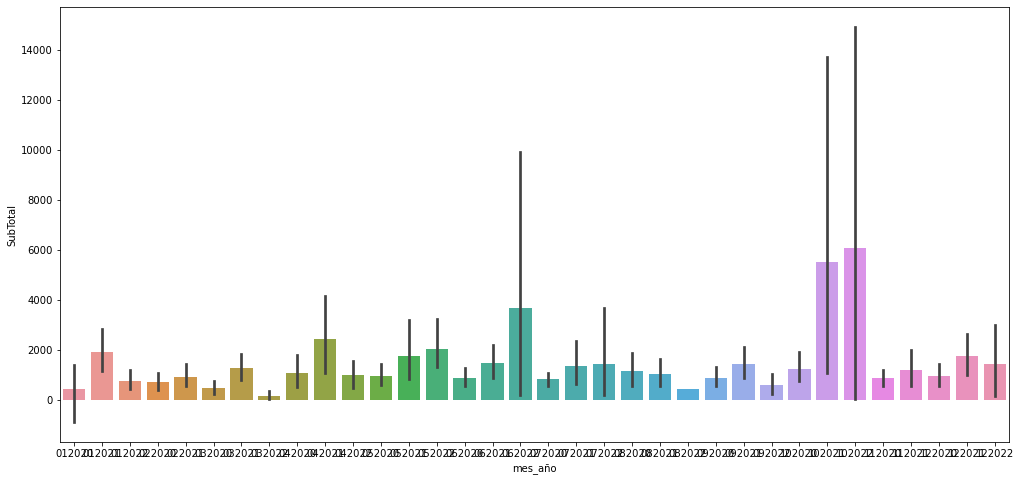

In [12]:
plt.figure(figsize=(17,8))
sns.barplot(data=category_ammount,x='mes_año',y='SubTotal')

In [13]:
category_ammount

,mes_año,Categoria,year,Producto,SubTotal
0,012020,LOGÍSTICA,2020,NAFTA,72.00
1,012020,SECO,2020,HARINA GARBANZO,100.00
2,012020,ADMIN,2020,ADMINISTRATIVO,2795.00
3,012020,ADMIN,2020,TALONARIO,50.00
4,012020,COMERCIAL,2020,MARKETING,150.00
...,...,...,...,...,...
706,122021,SECO,2021,SOJA,1557.59
707,122022,COMERCIAL,2022,MANTENIMIENTO,3950.00
708,122022,FRESCO,2022,ACEITUNA,120.00
709,122022,PACKAGING,2022,SELLO,1525.00


<AxesSubplot:xlabel='Categoria', ylabel='SubTotal'>

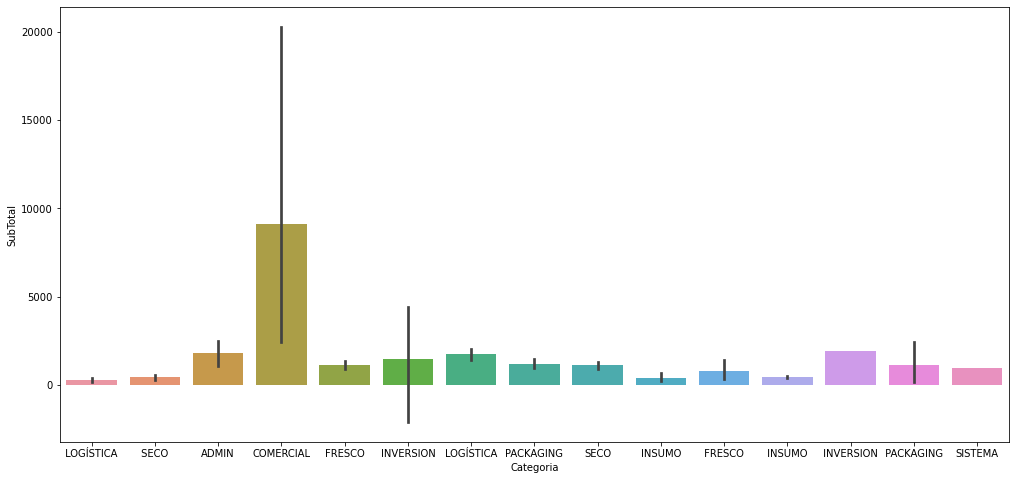

In [14]:
plt.figure(figsize=(17,8))
sns.barplot(data=category_ammount,x='Categoria',y='SubTotal')

In [15]:
# I am going to asume that "comercial,admin, inversión" its immovable
# So focus the analysis in Packaging, Fresco, Seco y Logística

In [16]:
# look duplicates: logistica, seco, inversion, packaging, insumo

<AxesSubplot:xlabel='Categoria', ylabel='SubTotal'>

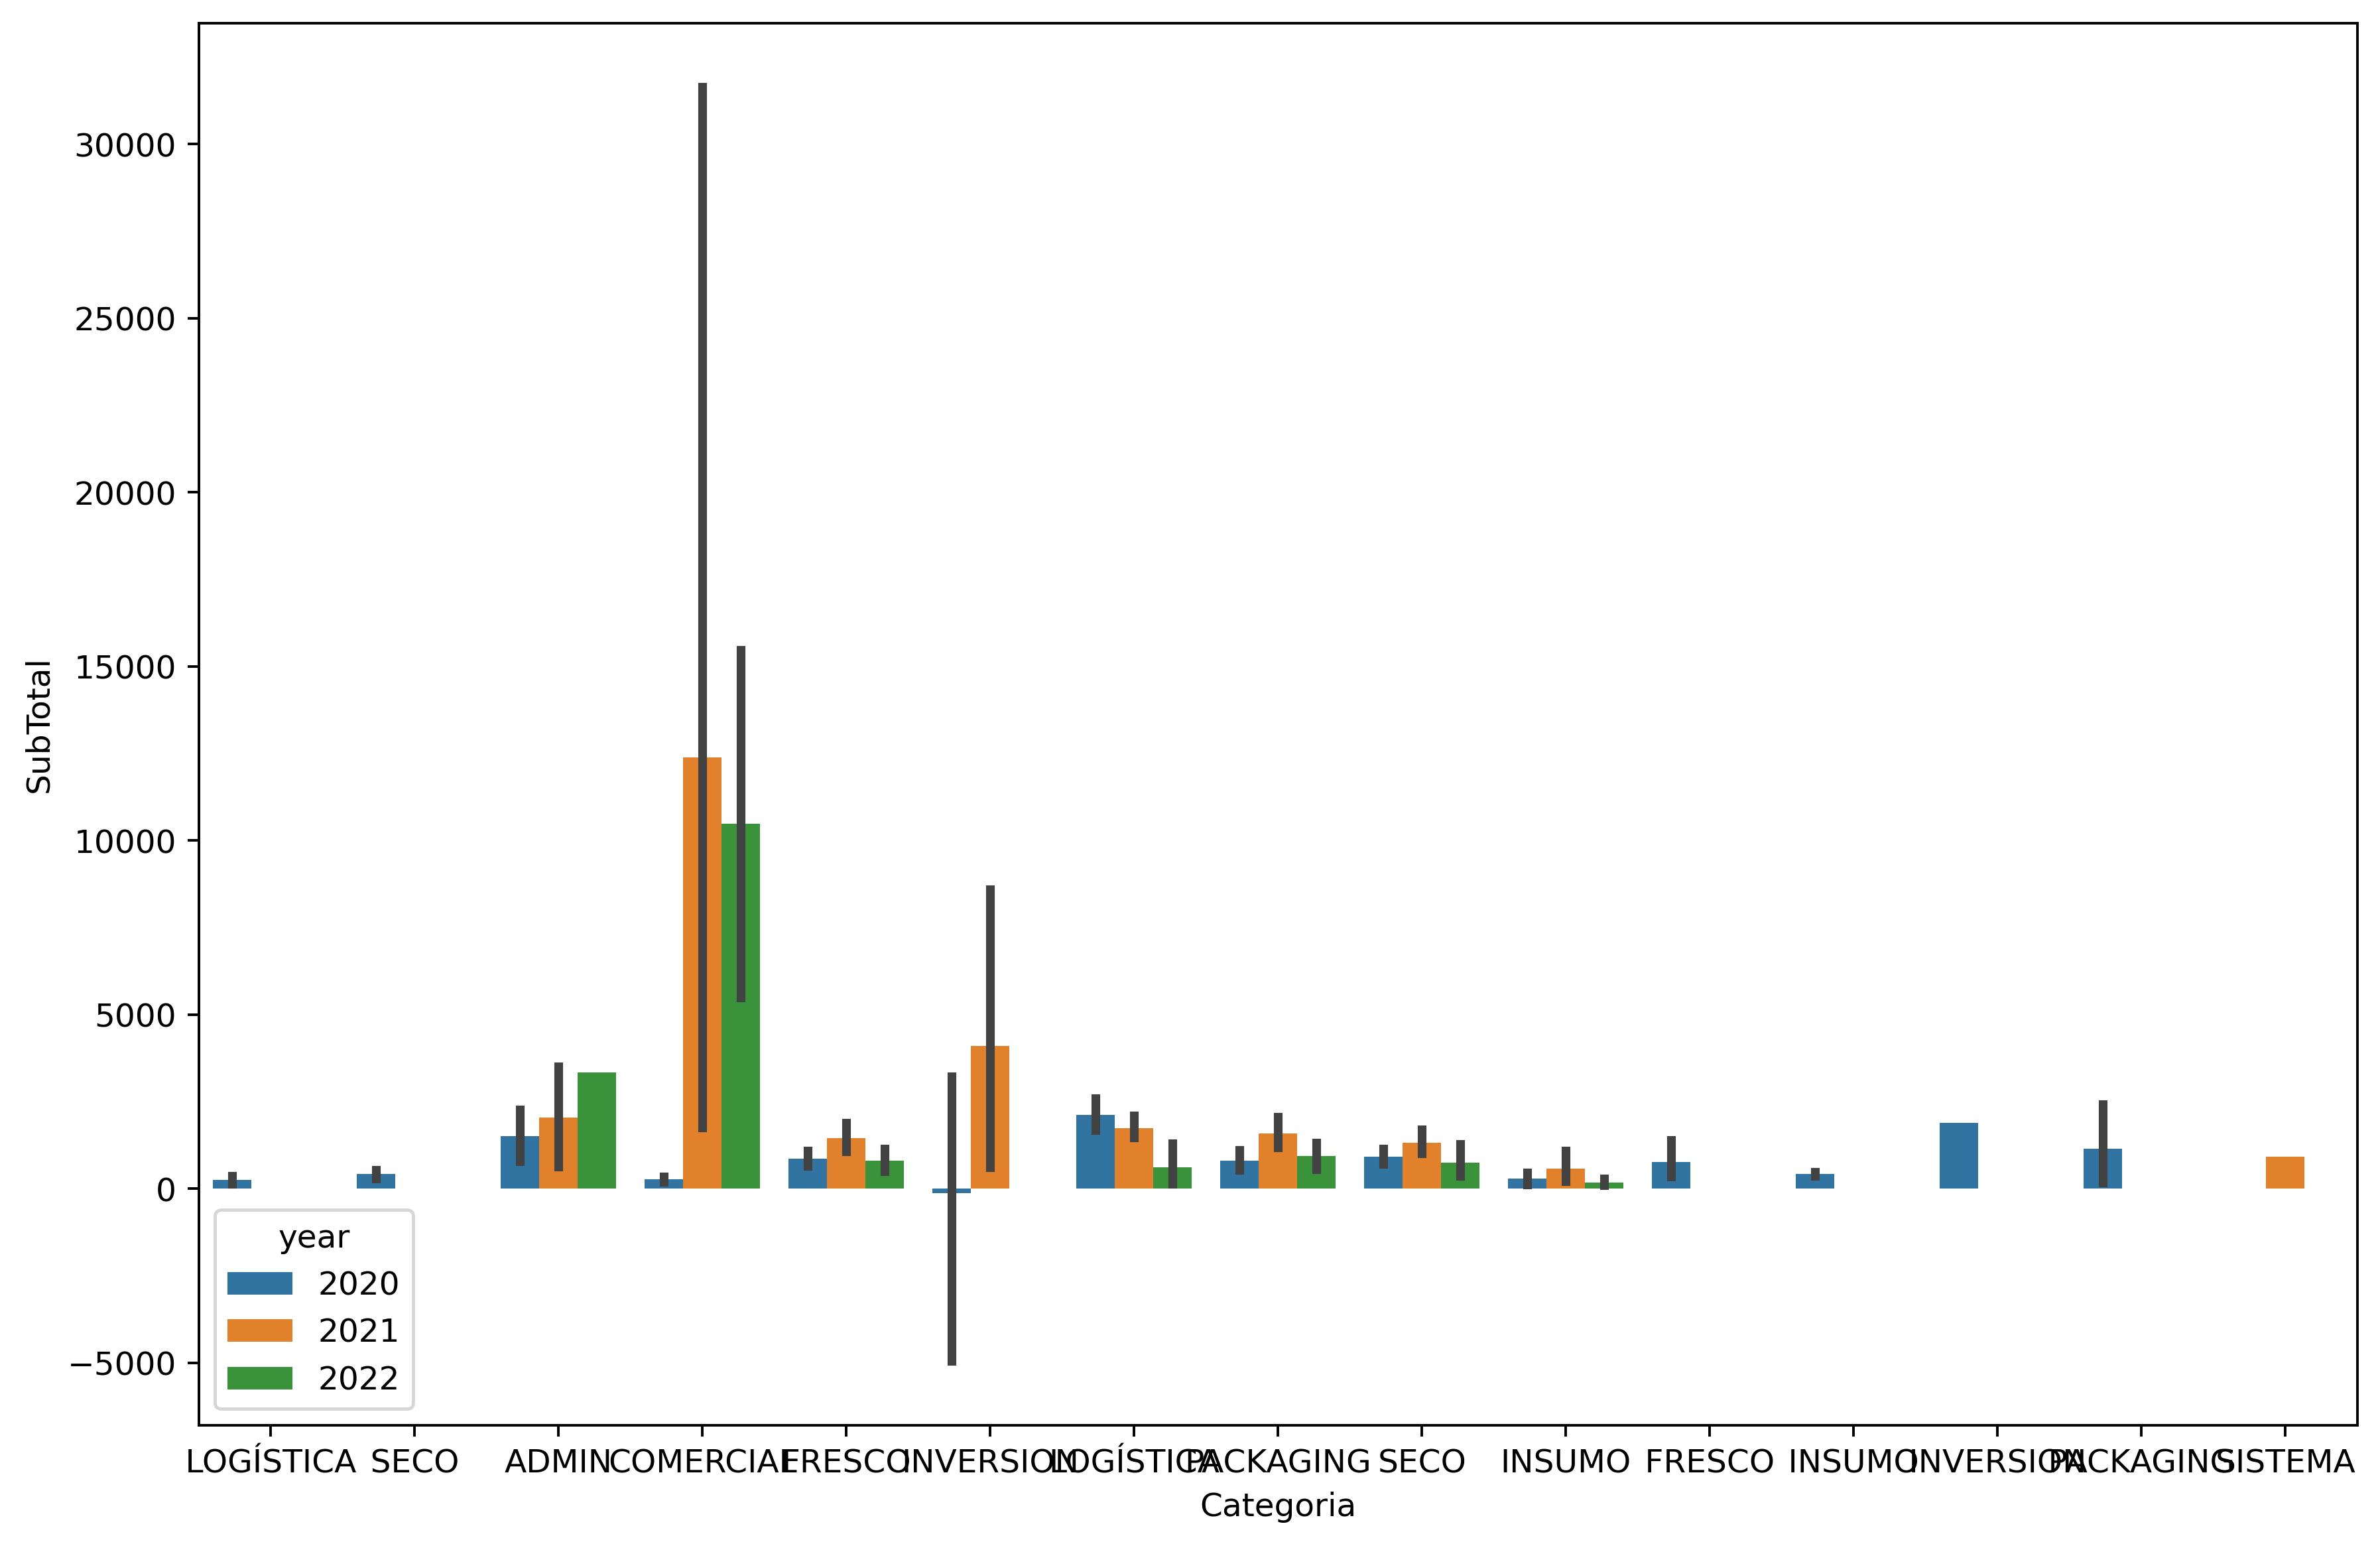

In [17]:
plt.figure(figsize=(12,8),dpi=350)
sns.barplot(data=category_ammount,x='Categoria',y='SubTotal',hue='year')

<AxesSubplot:xlabel='Categoria', ylabel='SubTotal'>

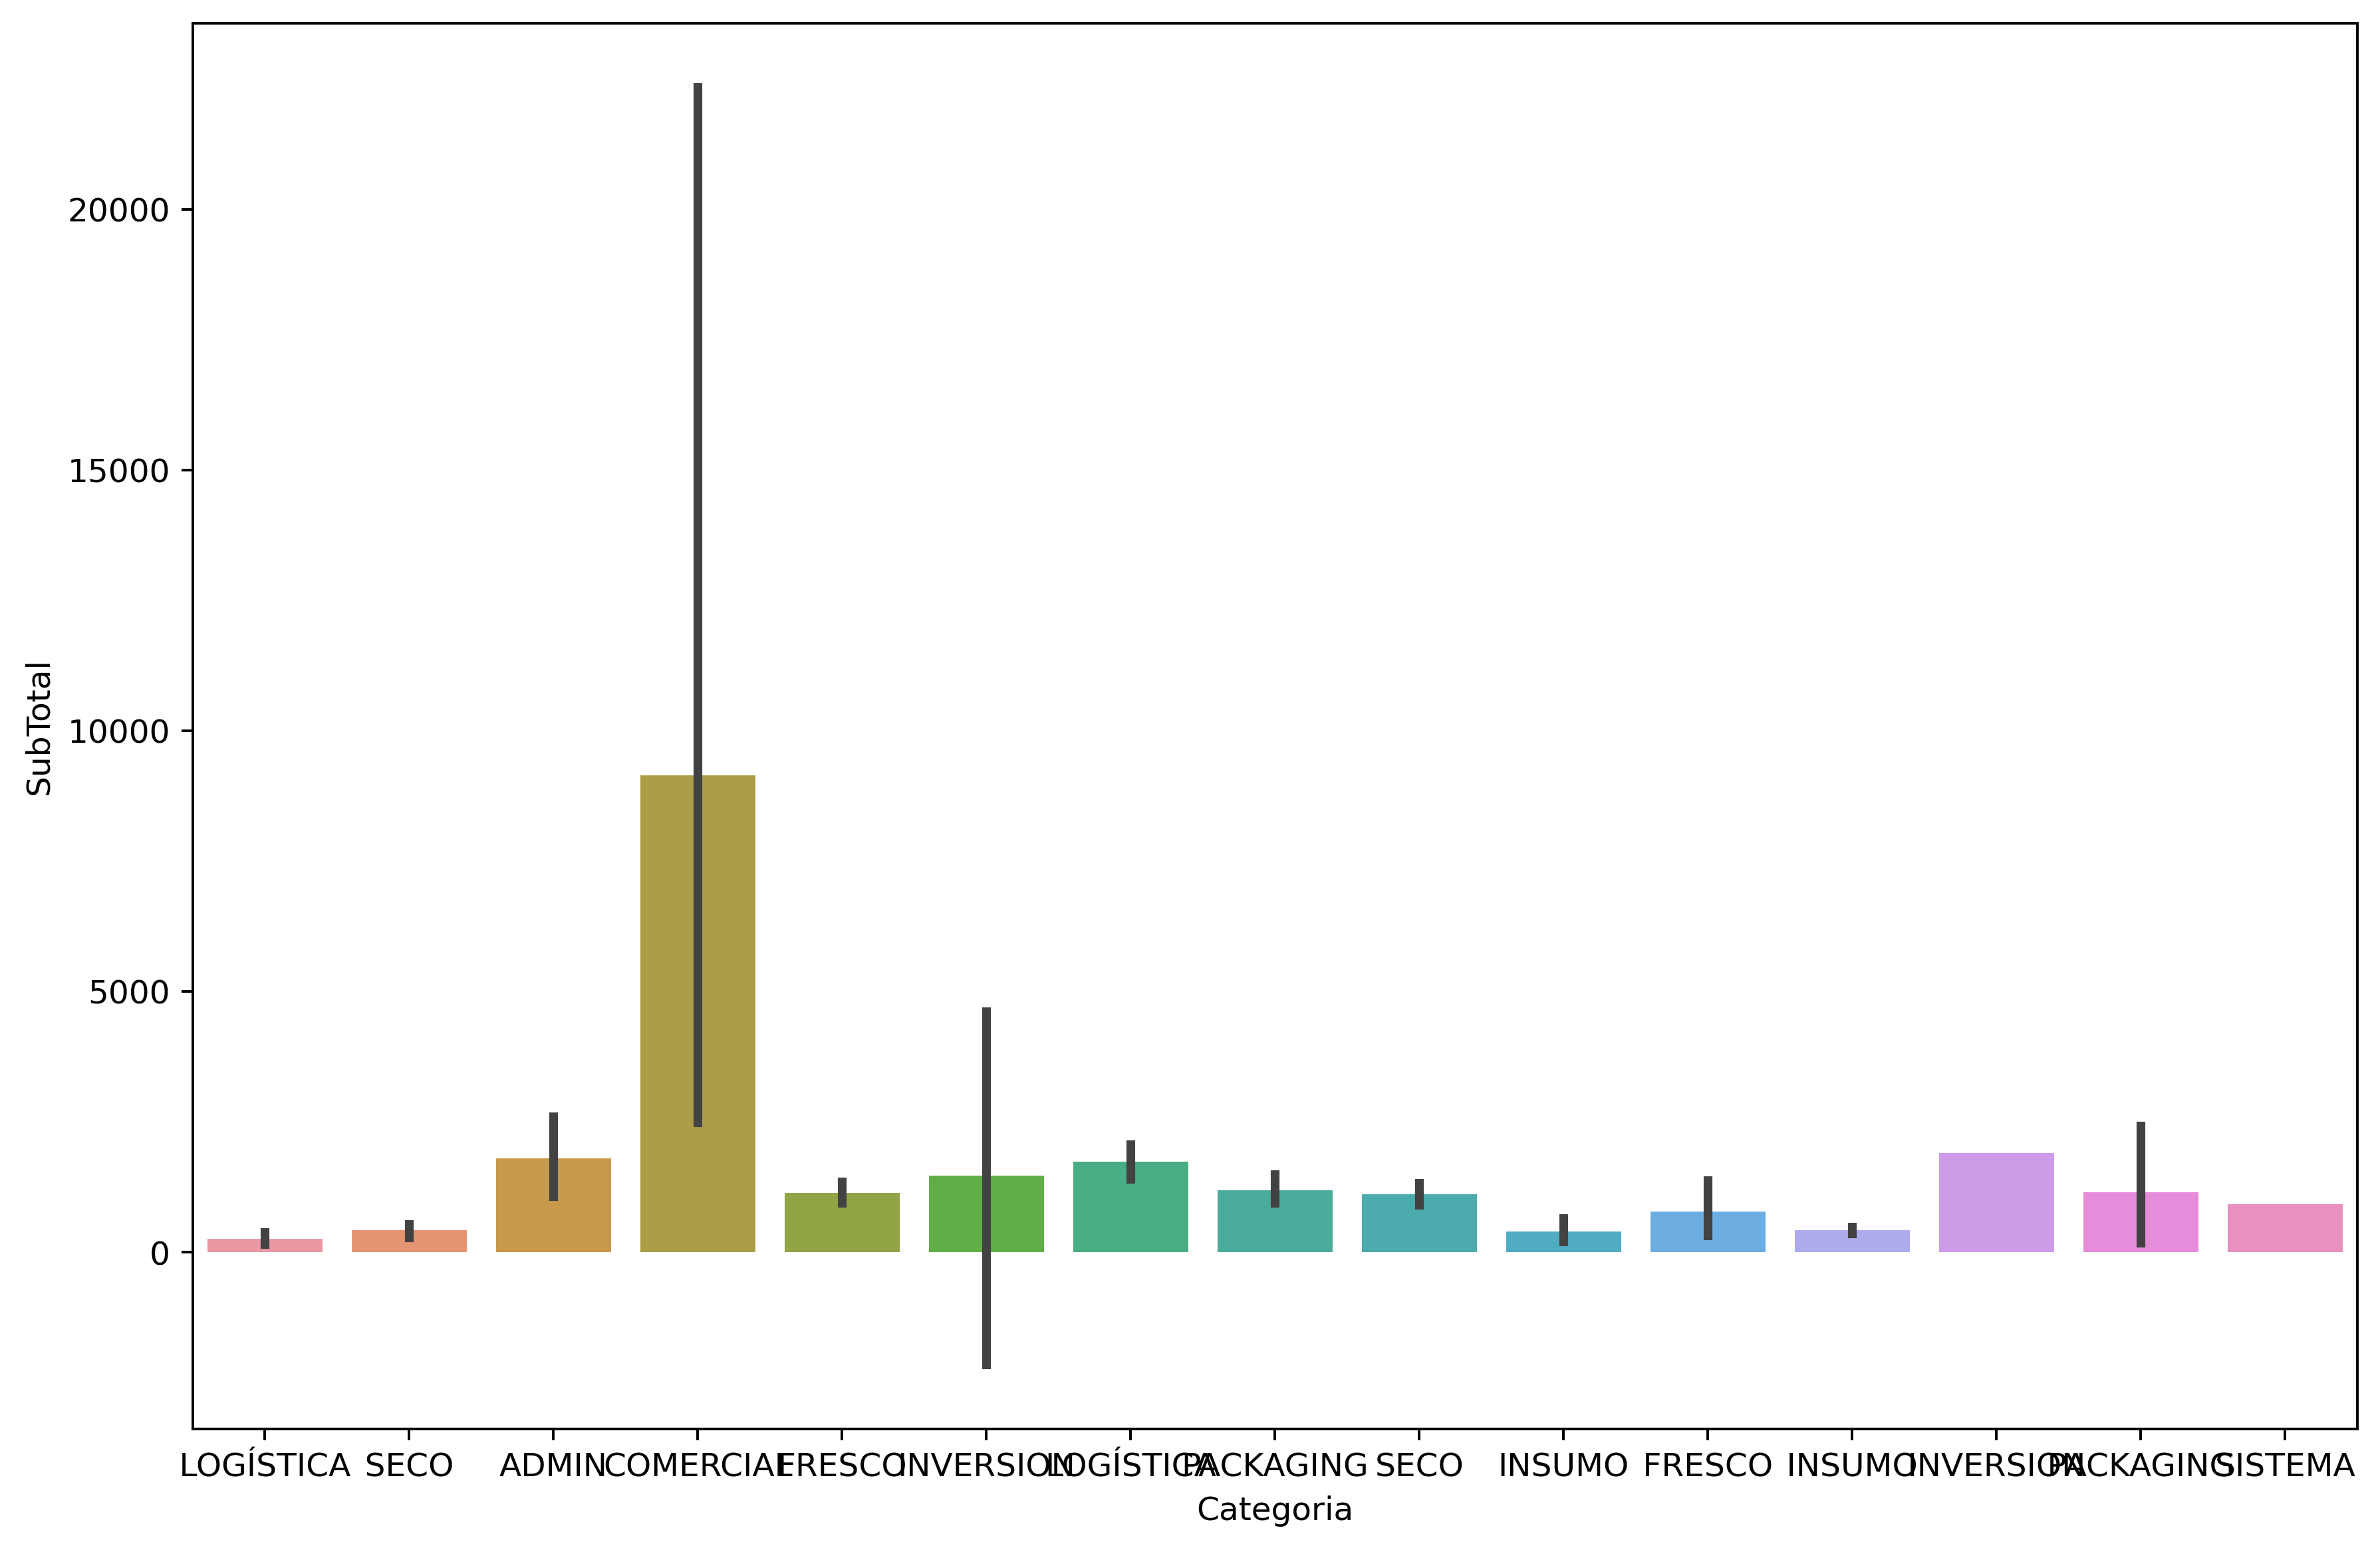

In [18]:
plt.figure(figsize=(12,8),dpi=350)
sns.barplot(data=category_ammount,x='Categoria',y='SubTotal')

In [19]:
fresco = category_ammount[category_ammount['Categoria'].isin(['FRESCO'])]

In [20]:
fresco.sort_values('SubTotal')

,mes_año,Categoria,year,Producto,SubTotal
324,062020,FRESCO,2020,ACEITUNA,37.95
395,072020,FRESCO,2020,ZANAHORIA,48.15
151,032020,FRESCO,2020,MORRONES,49.30
648,112021,FRESCO,2021,TOMATE,50.00
198,042020,FRESCO,2020,ESPINACA,50.00
...,...,...,...,...,...
226,042021,FRESCO,2021,QUESO FRESCO,10305.63
424,072021,FRESCO,2021,QUESO FRESCO,10429.71
693,122021,FRESCO,2021,QUESO FRESCO,10648.78
54,012021,FRESCO,2021,QUESO FRESCO,14832.75


<AxesSubplot:xlabel='Producto', ylabel='SubTotal'>

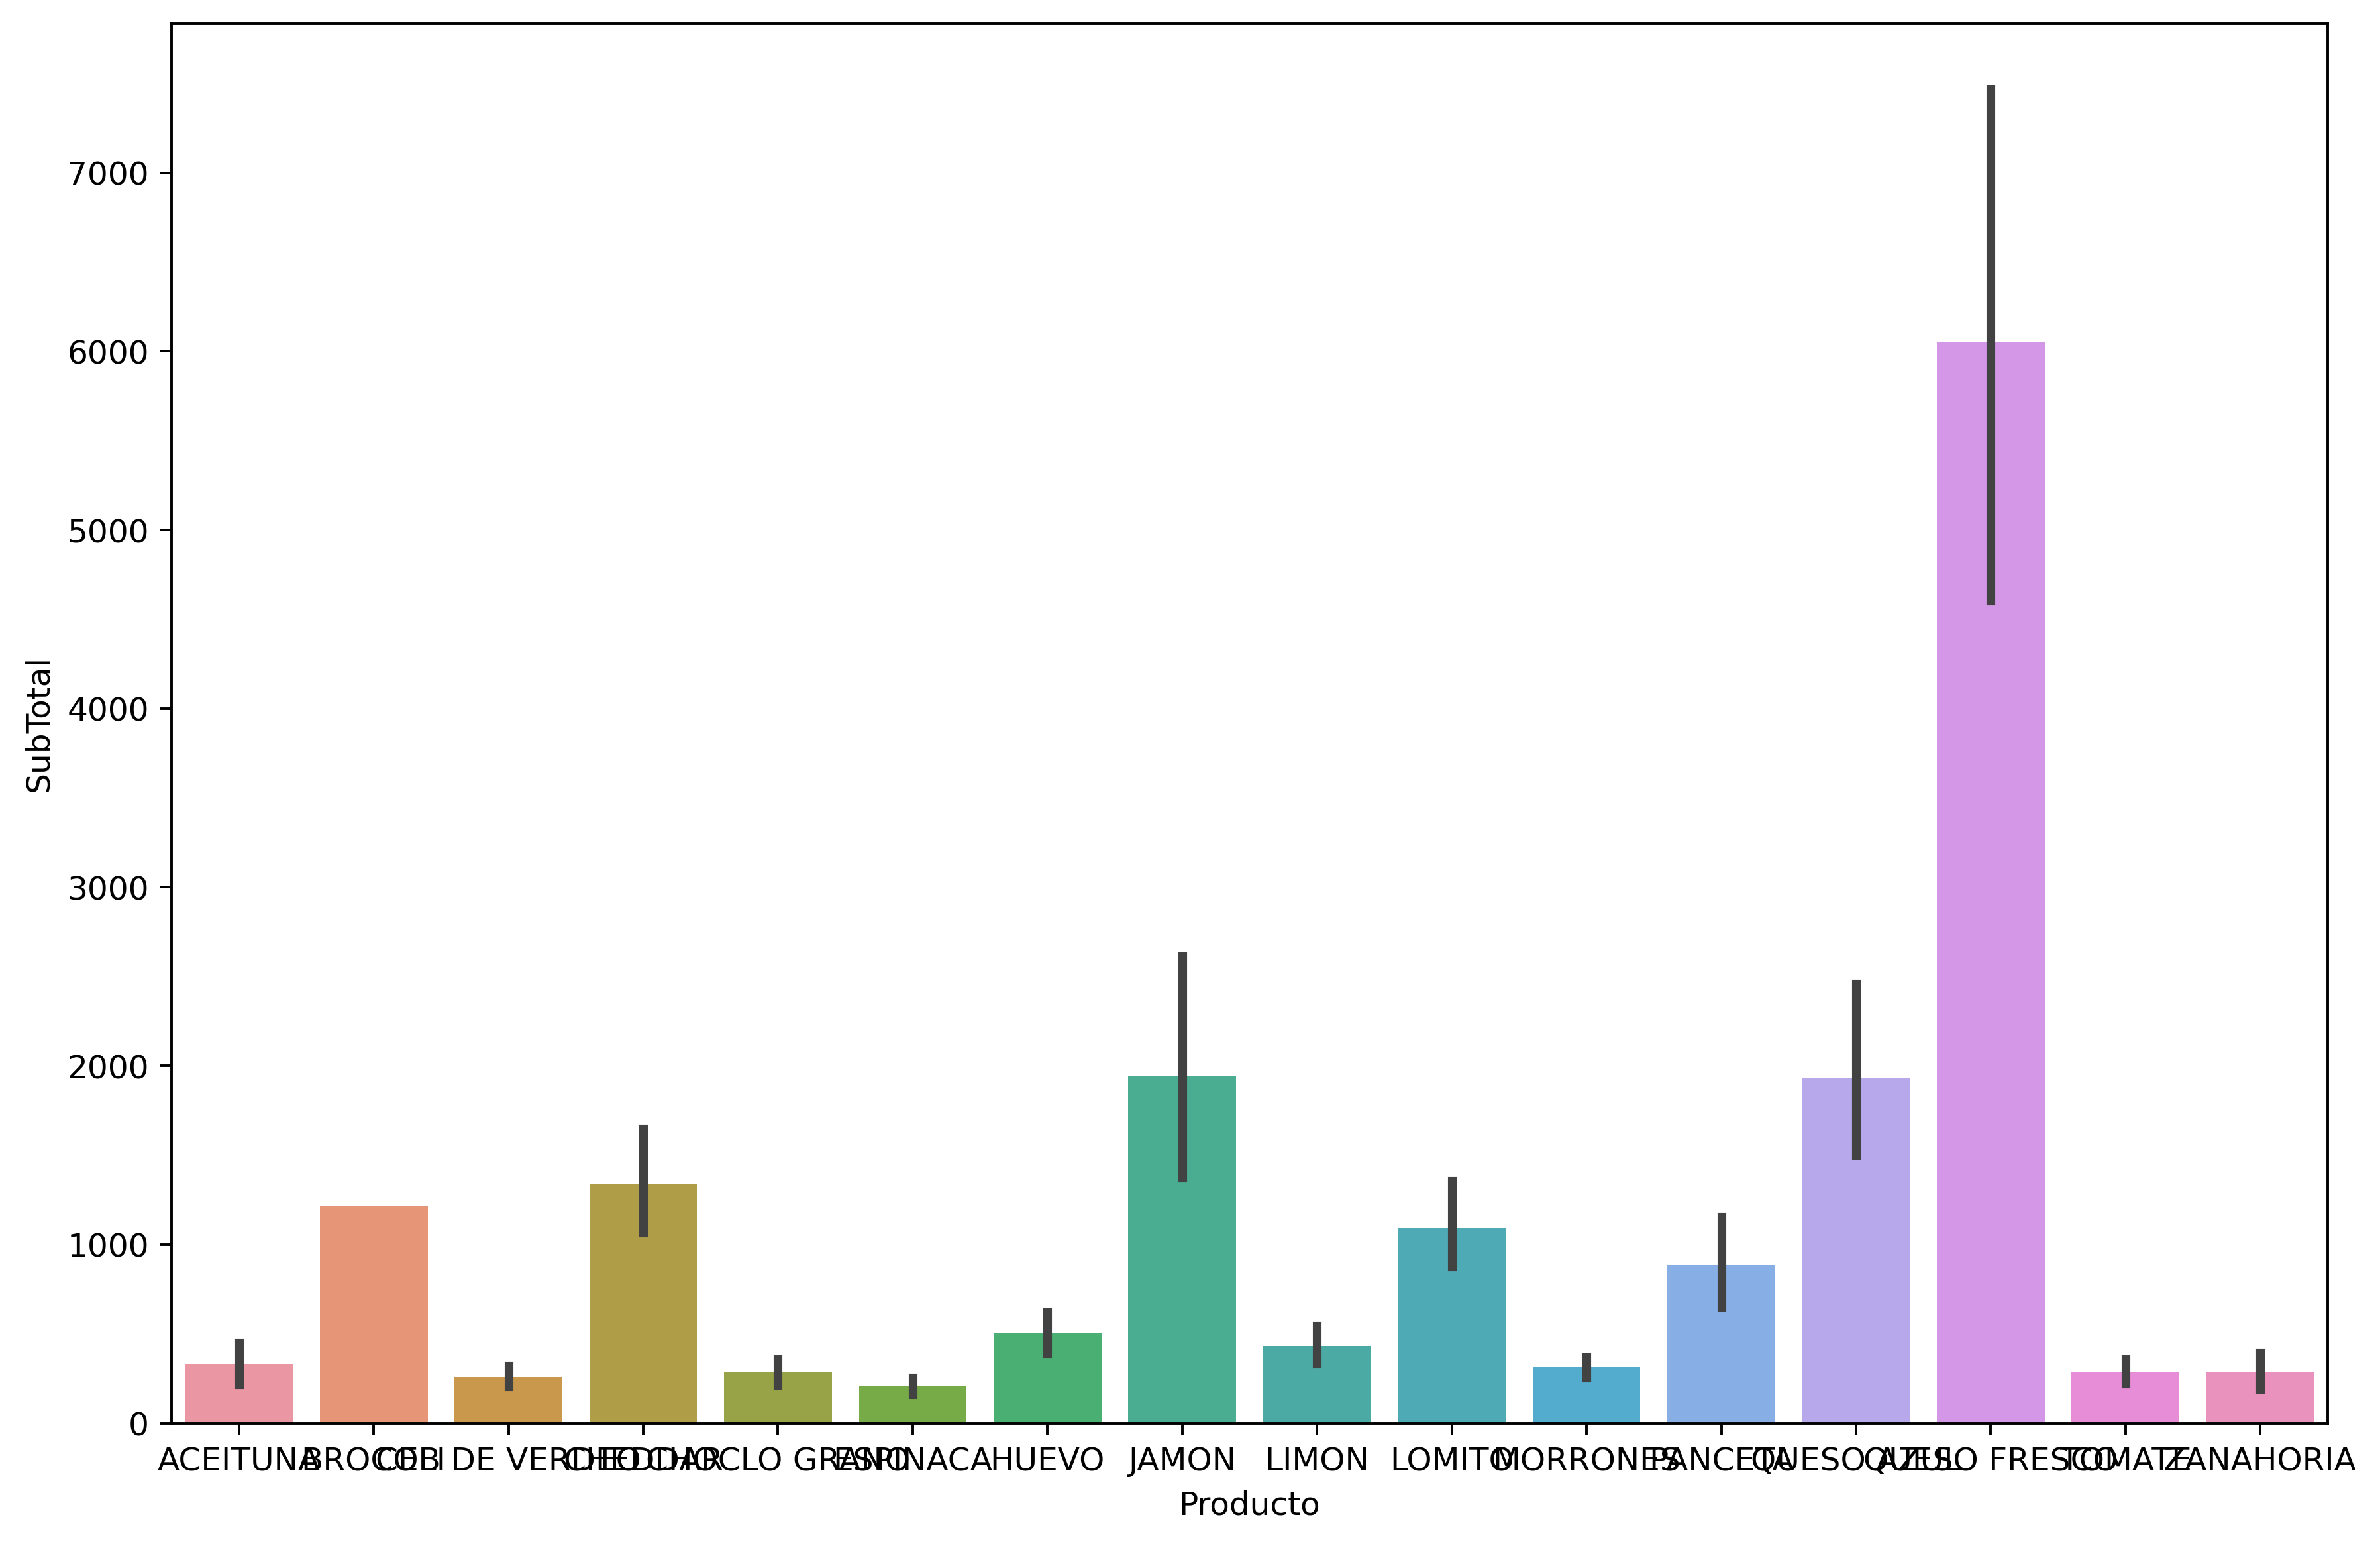

In [21]:
plt.figure(figsize=(12,8),dpi=350)
sns.barplot(data=fresco,x='Producto',y='SubTotal')

In [22]:
fresco.nlargest(10,'SubTotal')

,mes_año,Categoria,year,Producto,SubTotal
283,052021,FRESCO,2021,QUESO FRESCO,16260.85
54,012021,FRESCO,2021,QUESO FRESCO,14832.75
693,122021,FRESCO,2021,QUESO FRESCO,10648.78
424,072021,FRESCO,2021,QUESO FRESCO,10429.71
226,042021,FRESCO,2021,QUESO FRESCO,10305.63
517,092021,FRESCO,2021,QUESO FRESCO,8030.05
647,112021,FRESCO,2021,QUESO FRESCO,7987.04
18,012020,FRESCO,2020,QUESO FRESCO,7717.95
356,062021,FRESCO,2021,QUESO FRESCO,7332.29
205,042020,FRESCO,2020,QUESO FRESCO,6611.62


Fresch Cheese is the biggest product on the category so I recomend develop new sellers/providers

In [ ]:
plt.figure(figsize=(17,8))
sns.barplot(data=df,x='mes_año',y='Cantidad')

In [ ]:
plt.figure(figsize=(17,8))
sns.barplot(data=df,x='mes_año',y='SubTotal')

In [ ]:
plt.figure(figsize=(17,8))
sns.histplot(data=df,x='mes_año',y='SubTotal')

In [ ]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x='mes_año',y='SubTotal')